<a href="https://colab.research.google.com/github/SHANUKRISHNAN/SHANU/blob/main/BSE%20SENSEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df=pd.read_csv('/content/BSE SENSEX.csv')
df.head()

,Date,Open,High,Low,Close
0,1-April-2014,22455.23,22485.77,22295.65,22446.44
1,2-April-2014,22550.58,22592.10,22473.46,22551.49
2,3-April-2014,22598.19,22620.65,22369.28,22509.07
3,4-April-2014,22522.46,22525.21,22339.40,22359.50
4,7-April-2014,22355.56,22481.62,22197.51,22343.45


In [121]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [122]:
from sklearn.model_selection import train_test_split

In [123]:
y=df['Close']
x=df.drop(['Close','Date'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"x_train shape: {x_train.shape},x_test shape: {x_test.shape},y_train shape: {y_train.shape},y_test shape: {y_test.shape},x_train,x_test,y_train,y_test : {x_train,x_test,y_train,y_test}")

x_train shape: (1975, 3)
x_test shape: (494, 3)
x_train shape: (1975, 3),x_test shape: (494, 3),y_train shape: (1975,),y_test shape: (494,),x_train,x_test,y_train,y_test : (          Open      High       Low
1577  38948.46  39008.89  38679.67
1320  36808.01  37405.48  36655.41
1046  35207.19  35282.40  34937.15
2378  65461.54  65747.65  65373.50
1040  35329.61  35571.37  35329.51
...        ...       ...       ...
503   25891.03  25891.03  25585.93
924   34059.99  34101.13  33766.15
2134  61126.56  61466.63  61073.68
151   28193.90  28294.01  27963.51
1692  51146.67  51523.38  51146.67

[1975 rows x 3 columns],           Open      High       Low
599   29062.90  29062.90  28755.08
394   26094.09  26094.09  25709.23
552   27064.33  27243.36  27061.40
1451  41121.51  41357.16  41048.93
2097  57376.52  57704.57  56950.52
...        ...       ...       ...
1402  40561.34  40712.65  40490.69
1949  57551.65  58141.96  57167.02
1807  52673.69  52673.69  51802.73
1124  34203.70  34300.97  33726

In [124]:
from scipy.stats import skew


In [125]:
print(f'skew of x_train:\n\n{x_train.skew()}')

skew of x_train:

Open    0.661771
High    0.660641
Low     0.666212
dtype: float64


<Axes: >

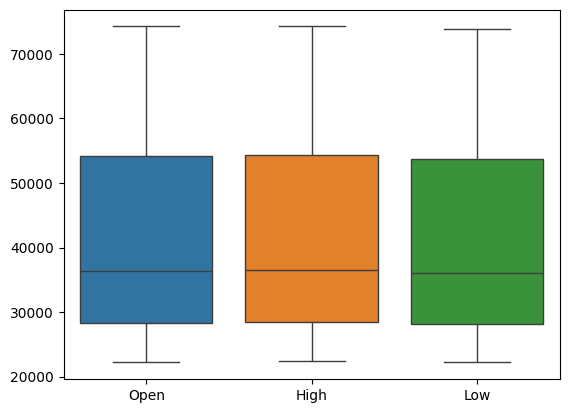

In [126]:
sns.boxplot(x_train)

<Axes: ylabel='Density'>

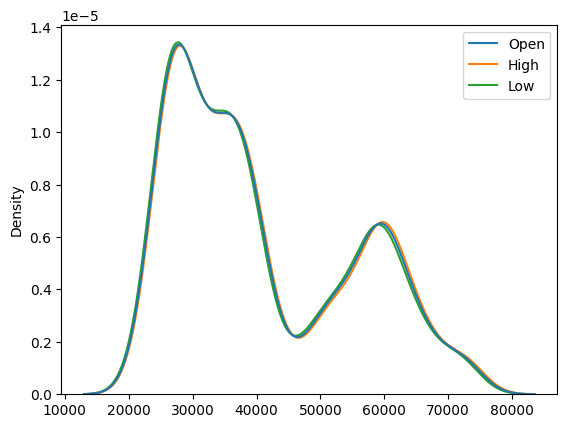

In [127]:
sns.kdeplot(x_train)

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
MMS=MinMaxScaler()
x_train=MMS.fit_transform(x_train)
x_test=MMS.transform(x_test)

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
m=DecisionTreeRegressor()
m.fit(x_train,y_train)


DecisionTreeRegressor()

In [132]:
y_pred=m.predict(x_test)


In [133]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [134]:
mean_absolute_error(y_test,y_pred)

153.79732793522277

In [135]:
mean_squared_error(y_test,y_pred)

61987.044480971716

In [136]:
r2_score(y_test,y_pred)


0.9996924226985107

In [137]:
root_mean_squared_error(y_test,y_pred)

248.97197529234433

In [138]:
from sklearn import tree

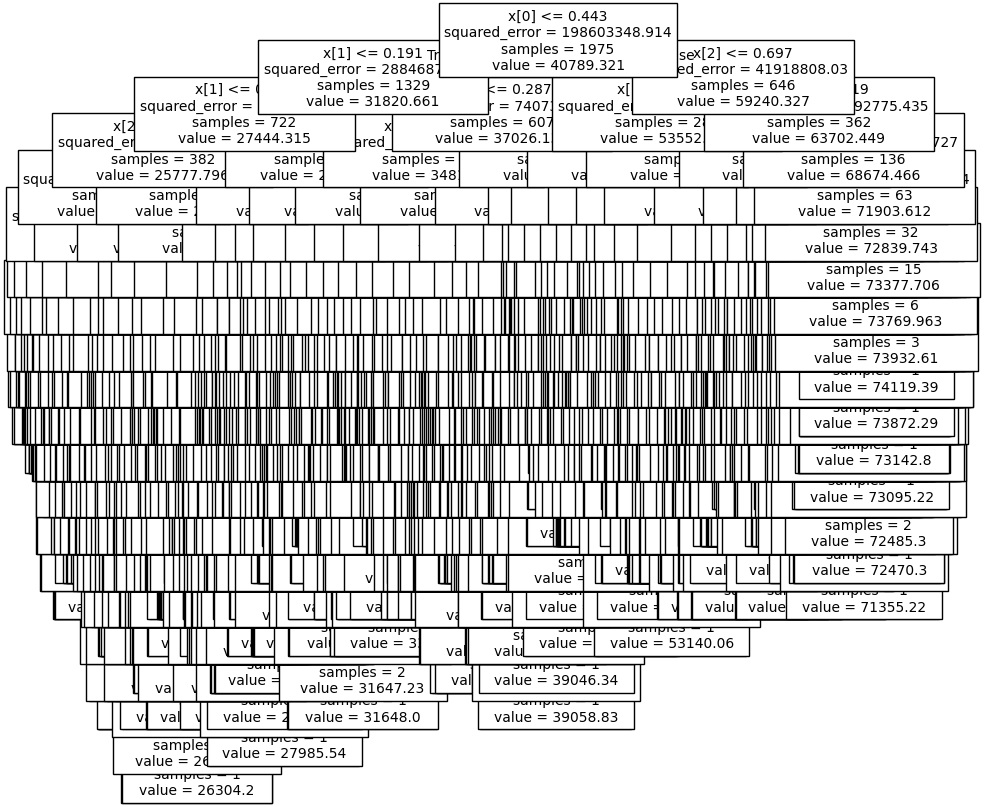

In [139]:
fig,ax=plt.subplots(figsize=(10,10))
tree.plot_tree(m,fontsize=10)
plt.show()

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
r=RandomForestRegressor()
r.fit(x_train,y_train)

RandomForestRegressor()

In [142]:
y_pred=r.predict(x_test)


In [143]:
mean_absolute_error(y_test,y_pred)

128.10303097166067

In [144]:
mean_squared_error(y_test,y_pred)

39570.79950564139

In [145]:
r2_score(y_test,y_pred)


0.9998036512333887

In [146]:
root_mean_squared_error(y_test,y_pred)

198.92410488837544